# SCDC Plot from Saved CSV Results

This notebook loads pre-computed SCDC results and creates publication-quality plots.
No need to re-run experiments - just visualize existing data.

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Path setup
REPO_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
RESULTS_DIR = os.path.join(REPO_ROOT, 'PatrickProject', 'Chart_Generation')

# Load the summary CSV (has pre-calculated statistics)
summary_file = os.path.join(RESULTS_DIR, 'scdc_perclass_summary.csv')

if not os.path.exists(summary_file):
    print(f"File not found: {summary_file}")
    print("Please run SCDC_PerClass_Analysis.ipynb first to generate the data.")
else:
    summary_df = pd.read_csv(summary_file)
    print(f"Loaded data from {summary_file}")
    print(f"Shape: {summary_df.shape}")
    print("\nFirst few rows:")
    print(summary_df.head())
    
    # Check what models and classes we have
    models = summary_df['model'].unique()
    classes_in_data = summary_df['class'].unique()
    print(f"\nModels found: {models}")
    print(f"Number of classes: {len(classes_in_data)}")

Loaded data from c:\Users\jbats\Projects\NTU-Synthetic\PatrickProject\Chart_Generation\scdc_perclass_summary.csv
Shape: (130, 9)

First few rows:
          model          class  mean_accuracy       std        se      ci95  \
0  cvcl-resnext         abacus       0.285556  0.020367  0.011759  0.023047   
1  cvcl-resnext          apple       0.292222  0.016443  0.009493  0.018607   
2  cvcl-resnext            axe       0.277778  0.003849  0.002222  0.004356   
3  cvcl-resnext  babushkadolls       0.357778  0.041410  0.023908  0.046860   
4  cvcl-resnext          bagel       0.236667  0.024037  0.013878  0.027200   

   n_seeds  total_trials test_type  
0        3          1500      SCDC  
1        3          1500      SCDC  
2        3          1500      SCDC  
3        3          1500      SCDC  
4        3          1500      SCDC  

Models found: ['cvcl-resnext' 'clip-res']
Number of classes: 65


In [18]:
# Reconstruct stats_results from CSV (EXACT SAME LOGIC AS CLASS VERSION)
stats_results = {}
models = summary_df['model'].unique()

for model in models:
    stats_results[model] = {}
    model_data = summary_df[summary_df['model'] == model]
    
    for _, row in model_data.iterrows():
        stats_results[model][row['class']] = {
            'mean': row['mean_accuracy'],
            'std': row['std'],
            'se': row['se'],
            'ci95': row['ci95'],
            'n_samples': row['n_seeds'],
            'total_trials': row['total_trials']
        }

models_to_test = list(models)
print(f"Models found: {models_to_test}")
print(f"Number of classes: {len(stats_results[models_to_test[0]])}")

Models found: ['cvcl-resnext', 'clip-res']
Number of classes: 65


C:\Users\jbats\AppData\Local\Temp\ipykernel_28180\3944000284.py:130: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\jbats\AppData\Local\Temp\ipykernel_28180\3944000284.py:152: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


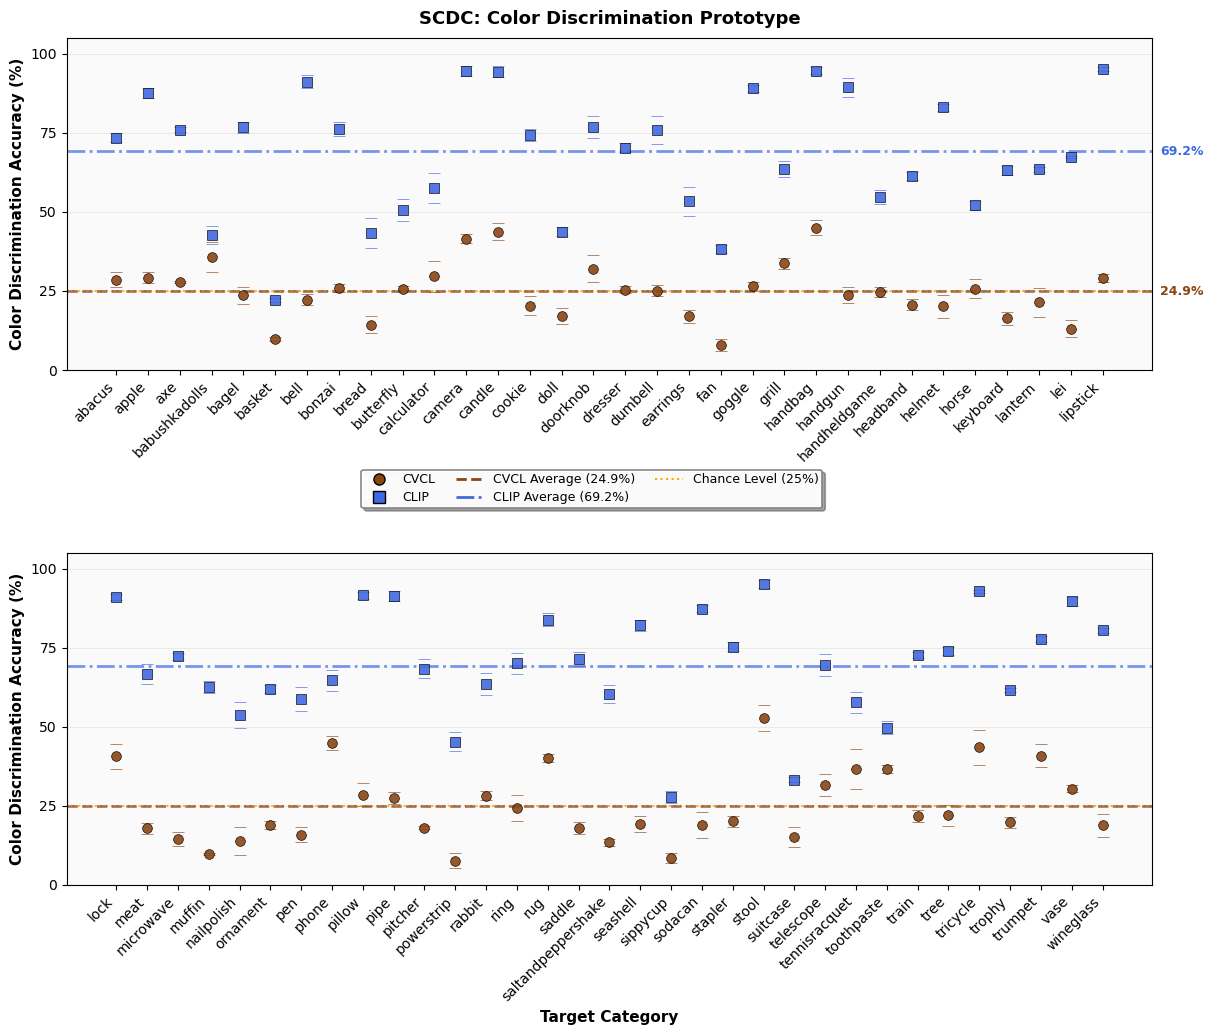

Saved SCDC plots from CSV data to:
  - c:\Users\jbats\Projects\NTU-Synthetic\PatrickProject\Chart_Generation\scdc_perclass_from_csv.png
  - c:\Users\jbats\Projects\NTU-Synthetic\PatrickProject\Chart_Generation\scdc_perclass_from_csv.pdf


In [21]:
# Create publication-quality visualization with two subplots (MATCHING CLASS LOGIC)
fig = plt.figure(figsize=(14, 11))

# Create subplots with space for legend in between
ax1 = plt.subplot2grid((20, 1), (0, 0), rowspan=8)
ax2 = plt.subplot2grid((20, 1), (12, 0), rowspan=8)

# Prepare data for plotting - uses keys from stats_results which come from CSV
classes = sorted(list(stats_results[models_to_test[0]].keys()))

# Split classes into two groups
mid_point = len(classes) // 2
classes_first_half = classes[:mid_point]
classes_second_half = classes[mid_point:]

# Define colors and styles (SCDC-specific colors to show CVCL struggles, CLIP excels)
colors = {
    'cvcl-resnext': '#8b4513',  # Brown - CVCL struggles with color
    'clip-res': '#4169e1'  # Royal blue - CLIP excels at color
}
markers = {
    'cvcl-resnext': 'o',
    'clip-res': 's'  # Square for CLIP
}
avg_line_styles = {
    'cvcl-resnext': '--',
    'clip-res': '-.'
}

# Short display labels for the legend
short_labels = {
    'cvcl-resnext': 'CVCL',
    'clip-res': 'CLIP'
}

# Store legend elements globally
legend_elements = []

# Function to plot data on an axis (EXACT SAME AS CLASS VERSION)
def plot_on_axis(ax, class_subset, is_first=False):
    x_pos = np.arange(len(class_subset))
    
    # Plot each model
    for model_name in models_to_test:
        means = [stats_results[model_name][cls]['mean'] * 100 for cls in class_subset]
        errors = [stats_results[model_name][cls]['ci95'] * 100 for cls in class_subset]
        
        ax.errorbar(x_pos, means, yerr=errors, 
                    label=None,
                    color=colors[model_name],
                    marker=markers[model_name],
                    markersize=7,
                    linewidth=0,
                    capsize=4,
                    capthick=1.5,
                    alpha=0.9,
                    markeredgecolor='black',
                    markeredgewidth=0.5)
    
    # Add chance line
    ax.axhline(y=25, color='#ffa500', linestyle=':', alpha=0.8, linewidth=1.5)
    
    # Calculate and add average lines
    all_classes_means = {}
    for model_name in models_to_test:
        all_means = [stats_results[model_name][cls]['mean'] * 100 for cls in classes]
        all_classes_means[model_name] = np.mean(all_means)
    
    for model_name in models_to_test:
        avg_performance = all_classes_means[model_name]
        ax.axhline(y=avg_performance, 
                  color=colors[model_name], 
                  linestyle=avg_line_styles[model_name], 
                  alpha=0.7, 
                  linewidth=2)
        
        if is_first:
            ax.text(len(class_subset) + 0.8, avg_performance, 
                   f'{avg_performance:.1f}%', 
                   fontsize=9, 
                   color=colors[model_name], 
                   va='center',
                   fontweight='bold')
    
    # Formatting (SCDC-specific y-label)
    ax.set_ylabel('Color Discrimination Accuracy (%)', fontsize=11, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(class_subset, rotation=45, ha='right', fontsize=10)
    ax.set_ylim(0, 105)
    ax.set_yticks([0, 25, 50, 75, 100])
    ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.set_facecolor('#fafafa')
    
    # Create legend elements (only once)
    global legend_elements
    if is_first:
        from matplotlib.lines import Line2D
        legend_elements = []
        
        for model_name in models_to_test:
            legend_elements.append(
                Line2D([0], [0], marker=markers[model_name], color='w', 
                      markerfacecolor=colors[model_name], markeredgecolor='black',
                      markersize=8, label=short_labels[model_name])
            )
        
        for model_name in models_to_test:
            avg_val = all_classes_means[model_name]
            legend_elements.append(
                Line2D([0], [0], color=colors[model_name], 
                      linestyle=avg_line_styles[model_name], linewidth=2,
                      label=f'{model_name.upper().split("-")[0]} Average ({avg_val:.1f}%)')
            )
        
        legend_elements.append(
            Line2D([0], [0], color='#ffa500', linestyle=':', linewidth=1.5,
                  label='Chance Level (25%)')
        )

# Plot both halves (SCDC-specific titles)
plot_on_axis(ax1, classes_first_half, is_first=True)
ax1.set_title('SCDC: Color Discrimination Prototype', 
              fontsize=13, fontweight='bold', pad=10)

plot_on_axis(ax2, classes_second_half, is_first=False)
ax2.set_xlabel('Target Category', fontsize=11, fontweight='bold')

# --- Legend centered between subplots (EXACT SAME AS CLASS VERSION) ---
plt.tight_layout()
plt.subplots_adjust(hspace=0.35)  # keep spacing between the two axes

legend = fig.legend(
    handles=legend_elements,
    loc='center',
    bbox_to_anchor=(0.5, 0.47),   # (x, y) in figure coords
    ncol=3,
    fontsize=9,
    frameon=True,
    fancybox=True,
    shadow=True,
    framealpha=0.95,
    borderpad=0.3,                # tighter box padding
    labelspacing=0.4,             # tighter line spacing
    handlelength=2.2,
    columnspacing=1.6
)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('gray')
legend.get_frame().set_linewidth(1.2)

plt.tight_layout()
plt.subplots_adjust(hspace=0.35)

plt.savefig(os.path.join(RESULTS_DIR, 'scdc_perclass_from_csv.png'), dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig(os.path.join(RESULTS_DIR, 'scdc_perclass_from_csv.pdf'), bbox_inches='tight', facecolor='white')
plt.show()

print(f"Saved SCDC plots from CSV data to:")
print(f"  - {os.path.join(RESULTS_DIR, 'scdc_perclass_from_csv.png')}")
print(f"  - {os.path.join(RESULTS_DIR, 'scdc_perclass_from_csv.pdf')}")

In [ ]:
# Analysis: Find biggest differences between models
print("\n" + "="*60)
print("COLOR DISCRIMINATION ANALYSIS")
print("="*60)

# Use classes from the CSV data, not from anywhere else
classes_in_csv = sorted(list(set(summary_df['class'].values)))

differences = []
for cls in classes_in_csv:
    # Check if both models have data for this class
    cvcl_data = summary_df[(summary_df['model'] == 'cvcl-resnext') & (summary_df['class'] == cls)]
    clip_data = summary_df[(summary_df['model'] == 'clip-res') & (summary_df['class'] == cls)]
    
    if not cvcl_data.empty and not clip_data.empty:
        cvcl_acc = cvcl_data.iloc[0]['mean_accuracy'] * 100
        clip_acc = clip_data.iloc[0]['mean_accuracy'] * 100
        diff = clip_acc - cvcl_acc
        differences.append((cls, diff, cvcl_acc, clip_acc))

differences.sort(key=lambda x: abs(x[1]), reverse=True)

print("\nTop 10 classes with LARGEST differences (CLIP advantage):")
print("-" * 60)
for i, (cls, diff, cvcl_acc, clip_acc) in enumerate(differences[:10]):
    print(f"{i+1:2d}. {cls:20s}: CVCL={cvcl_acc:5.1f}%, CLIP={clip_acc:5.1f}%, Diff={diff:+6.1f}%")

# Check if CVCL ever wins
cvcl_wins = [d for d in differences if d[1] < 0]
if cvcl_wins:
    print("\nClasses where CVCL > CLIP (unexpected):")
    print("-" * 60)
    for cls, diff, cvcl_acc, clip_acc in cvcl_wins[:5]:
        print(f"  {cls:20s}: CVCL={cvcl_acc:5.1f}%, CLIP={clip_acc:5.1f}%, Diff={diff:+6.1f}%")
else:
    print("\n✓ CLIP dominates color discrimination across ALL classes")
    print("  This confirms CLIP's advantage from text-based color training")

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

for model in models_to_test:
    model_data = summary_df[summary_df['model'] == model]
    model_means = model_data['mean_accuracy'].values * 100
    model_classes = model_data['class'].values
    
    print(f"\n{model}:")
    print(f"  Mean: {np.mean(model_means):.1f}%")
    print(f"  Std:  {np.std(model_means):.1f}%")
    print(f"  Min:  {np.min(model_means):.1f}% ({model_classes[np.argmin(model_means)]})")
    print(f"  Max:  {np.max(model_means):.1f}% ({model_classes[np.argmax(model_means)]})")

# Calculate average difference
if differences:
    avg_diff = np.mean([d[1] for d in differences])
    print(f"\nAverage CLIP advantage: {avg_diff:+.1f}%")
    print(f"This large difference demonstrates CLIP's superior color understanding")